In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

In [24]:
img_name='pic1grey300'
ext='.jpg'
img_dir=img_name+ext

window_size=3
k=0.04
threshold=0.3

In [25]:
img = cv2.imread(img_dir)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)
M = img.shape[0]   #.shape[0] outputs M 
N = img.shape[1]    #.shape[1] outputs N .shape[2] outputs color channels of image
matrix_R = np.zeros((M,N))

In [26]:
# Calculating derivatives using sobel to avoid large values thats inhibiting appropriate corners
Ix = cv2.Sobel(img_gaussian, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(img_gaussian, cv2.CV_64F, 0, 1, ksize=3)

In [27]:
#Calculating squares of derivatives
A=np.square(Ix)
B=np.square(Iy)
C=Ix*Iy

In [28]:
cornerList = []
cornerList2 = []
offset = int( window_size / 2 )

for y in range(offset, M-offset):
    for x in range(offset, N-offset):
        Aprime = np.sum(A[y-offset:y+1+offset, x-offset:x+1+offset])
        Bprime = np.sum(B[y-offset:y+1+offset, x-offset:x+1+offset])
        Cprime = np.sum(C[y-offset:y+1+offset, x-offset:x+1+offset])

        # defining M matrix
        H = np.array([[Aprime,Cprime],[Cprime,Bprime]])

        #Calculating R
        det=np.linalg.det(H)
        tr=np.matrix.trace(H)
        R=det-k*(tr**2)
        matrix_R[y-offset, x-offset]=R

In [29]:
#Thresholding R
cv2.normalize(matrix_R, matrix_R, 0, 1, cv2.NORM_MINMAX)
for y in range(offset, M-offset):
    for x in range(offset, N-offset):
        value=matrix_R[y, x]
        if value>threshold:
            cornerList.append([y,x])
            cornerList2.append((y,x))
            cv2.circle(img,(x,y),1,(0,0,255))

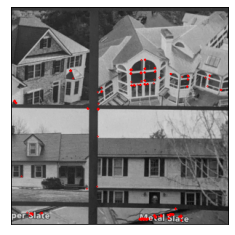

In [30]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),
plt.xticks([]), plt.yticks([])
plt.imsave(str('Harris' +img_name+ 'edges.' + 'jpg'), img)
plt.savefig('harris_detector'+img_name+'-thresh_%s.png'%(threshold), bbox_inches='tight')
plt.show()

In [31]:
filename = img_name +'corners.txt'
# open file in write mode
with open(filename, 'w') as fp:
    for i in cornerList:
        # write each item on a new line
        fp.write("%s\n" % i)
    print('Done')
#print(cornerList)

Done


In [32]:
fil = open("localDescriptors.txt", 'w')
for i, j in cornerList2:
    hn = np.zeros(8, dtype = np.float32)
    h = np.zeros(8, dtype = np.float32)
    for x in range(-4, 5):
        for y in range(-4, 5):
            if 0 <= i + x < M and 0 <= j + y < N:
                if Ix[i+x, j+y] != 0 and Iy[i+x, j+y] != 0:
                    angle = math.atan2(Iy[i+x, j+y], Ix[i+x, j+y])
                    index = math.ceil(angle/(math.pi/4)) % 8
                    h[index] += math.sqrt(Ix[i+x, j+y] * Ix[i+x, j+y] + Iy[i+x, j+y] * Iy[i+x, j+y])
    #find maximum
    Hmaxx = float('-inf')
    maxindex = 0
    for idx, num in enumerate(h):
        if num > Hmaxx:
            Hmaxx = num
            maxindex = idx
    
    #Rotate h() circularly to obtain hn()
    for i in range(8):
        hn[(4-2+i)%8] = h[(maxindex-2+i)%8]
    print((i,j), np.array2string(hn))
    fil.write("(" + str(i)+","+str(j) + ") ")
    fil.write(np.array2string(hn) + '\n')

(7, 184) [  94.21967    0.      3230.7727  1970.2775  4137.5337  1874.7563
   79.47268   76.90088]
(7, 179) [ 190.14967    29.467121    0.       1274.2738   5224.979    1902.5623
 3073.35       39.838223]
(7, 184) [  73.9217     76.90088    50.848846    0.       4158.9985   1970.2775
 4137.5337   2594.0198  ]
(7, 184) [2421.6946     31.241      35.608986 1206.8728   4114.528    3532.619
 1497.6846   3892.5176  ]
(7, 197) [ 473.1212   1120.1897   5250.0996   1684.0703   5810.0503      0.
   12.733433   11.089725]
(7, 198) [  29.653145   21.287764  346.2997   1138.1711   5248.733    1686.8987
 4903.8633      0.      ]
(7, 183) [1620.0657    930.3517     43.931767  792.23346  4462.9062   3399.6045
 1497.6846   3892.5176  ]
(7, 184) [1620.0657 1261.7125    0.      792.5238 4114.528  3532.619  1497.6846
 3892.5176]
(7, 164) [  15.143687  718.8036   1956.9723   1094.8126   6305.437     151.20168
   62.374615   29.171875]
(7, 165) [1.5143687e+01 1.5944259e+03 1.9696122e+03 1.0629657e+03 6.353

[3655.3772  1287.6187   311.57843  410.4462  2348.2334  3774.9077
 1248.56     899.01825]
[1287.6187   311.57843  410.4462  2348.2334  3774.9077  1248.56
  899.01825 3655.3772 ]


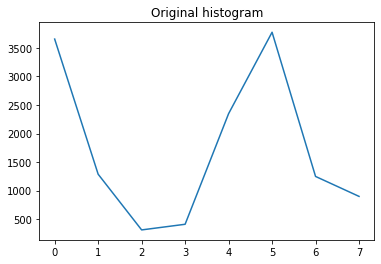

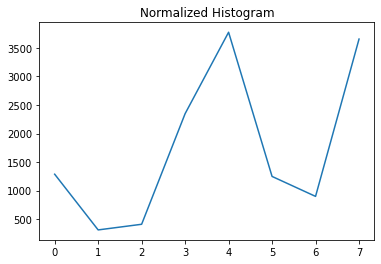

In [33]:
fil.close
print(h)
print(hn)
plt.plot(h)
plt.title('Original histogram')
plt.savefig('h'+img_name+'.jpg')
plt.show()

plt.plot(hn)
plt.title('Normalized Histogram')
plt.savefig('hn'+img_name+'.jpg')
plt.show()